<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_ARVIND_MAURYA_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **(a) [C, R] Some of the attributes in the data set are text data. Use a suitable procedure to convert them into suitable numerical representations in the training data and test data. Explain the procedure you used for the conversion.**

In this session, we shall apply logistic regression and look at predictions using it.

In [383]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us load the Q2 Classification train data

In [384]:
spam_class_train_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_train.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [385]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_train_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_train_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


We can now generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn

In [386]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_train_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [387]:
number_tf = gle.fit_transform(spam_class_train_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [388]:
spam_class_train_data['winner_tf'] = winner_tf
spam_class_train_data['number_tf'] = number_tf
spam_class_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big,0,0
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small,0,2
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small,0,2
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none,0,1
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,1.597,46,0,0,1,0,3,small,0,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0.333,13,0,0,0,0,0,big,0,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0.332,12,0,0,0,0,0,small,0,2
3134,1,0,1,0,0,0,0,2,yes,0,0,0,2.225,65,0,0,1,0,1,small,1,2


In [389]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_train_data_tf = spam_class_train_data.reindex(columns=column_names)
spam_class_train_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,0,11.370,202,1,0,0,0,0,big,0
1,0,0,1,0,0,0,0,0,no,0,0,0,0,10.504,202,1,0,0,0,1,small,2
2,0,0,1,0,0,0,0,0,no,0,0,0,0,13.256,255,1,0,0,0,48,small,2
3,0,0,1,0,0,0,0,0,no,0,0,0,2,1.231,29,0,0,0,0,1,none,1
4,0,0,1,0,0,0,0,0,no,0,0,0,2,1.091,25,0,0,0,0,1,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,0,1.597,46,0,0,1,0,3,small,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0,0.333,13,0,0,0,0,0,big,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0,0.332,12,0,0,0,0,0,small,2
3134,1,0,1,0,0,0,0,2,yes,1,0,0,0,2.225,65,0,0,1,0,1,small,2


In [390]:
#Lets Drop original column in dataframe
spam_class_train_data_tf= spam_class_train_data_tf.drop(['winner','number'], axis=1)
spam_class_train_data_tf


,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


Now Lets transform the test data

In [391]:
spam_class_test_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_test.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [392]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_test_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_test_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


In [393]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_test_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [394]:
number_tf = gle.fit_transform(spam_class_test_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [395]:
spam_class_test_data['winner_tf'] = winner_tf
spam_class_test_data['number_tf'] = number_tf
spam_class_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small,0,2
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small,0,2
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none,0,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small,0,2
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,31.104,744,1,0,0,0,3,small,0,2
781,0,0,1,0,0,0,0,0,no,0,0,0,30.201,728,1,0,0,0,3,small,0,2
782,0,0,1,0,0,0,0,10,no,0,0,0,74.753,1953,1,0,0,0,27,small,0,2
783,0,0,1,0,0,0,0,25,no,0,0,0,16.863,570,1,0,0,0,3,small,0,2


In [396]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_test_data_tf = spam_class_test_data.reindex(columns=column_names)
spam_class_test_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,0,20.133,364,1,0,0,0,8,small,2
1,1,0,1,0,0,0,0,0,no,0,0,0,0,3.796,71,1,0,0,0,4,small,2
2,1,0,1,0,0,0,0,0,no,0,0,0,0,2.705,35,1,0,0,0,0,none,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0,0.537,22,0,0,0,0,3,small,2
4,1,0,1,0,0,0,0,0,no,0,0,0,0,4.174,2,0,0,0,0,0,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,0,31.104,744,1,0,0,0,3,small,2
781,0,0,1,0,0,0,0,0,no,0,0,0,0,30.201,728,1,0,0,0,3,small,2
782,0,0,1,0,0,0,0,10,no,0,0,0,0,74.753,1953,1,0,0,0,27,small,2
783,0,0,1,0,0,0,0,25,no,0,0,0,0,16.863,570,1,0,0,0,3,small,2


In [397]:
#Lets Drop original column in test dataframe
spam_class_test_data_tf = spam_class_test_data_tf.drop(['winner', 'number'], axis=1)
spam_class_test_data_tf

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


In [398]:
#Let us now compute the size of train and test data post transformation of non numeric column
n_train = len(spam_class_train_data_tf.index) #number of data points in the data set
print('number of data points in the train data set:',n_train)
n_test = len(spam_class_test_data_tf.index) #number of data points in the data set
print('number of data points in the test data set:',n_test)

number of data points in the train data set: 3136
number of data points in the test data set: 785


In [399]:
#extract the predictor variable columns(X variables) from train and test transform dataset.
X_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[1:20]]
y_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[0]]
X_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[1:20]]
y_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[0]]



In [400]:
spam_class_test_data_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spam          785 non-null    int64  
 1   to_multiple   785 non-null    int64  
 2   from          785 non-null    int64  
 3   cc            785 non-null    int64  
 4   sent_email    785 non-null    int64  
 5   image         785 non-null    int64  
 6   attach        785 non-null    int64  
 7   dollar        785 non-null    int64  
 8   winner_tf     785 non-null    int64  
 9   inherit       785 non-null    int64  
 10  viagra        785 non-null    int64  
 11  password      785 non-null    int64  
 12  num_char      785 non-null    float64
 13  line_breaks   785 non-null    int64  
 14  format        785 non-null    int64  
 15  re_subj       785 non-null    int64  
 16  exclaim_subj  785 non-null    int64  
 17  urgent_subj   785 non-null    int64  
 18  exclaim_mess  785 non-null    

================================================================================

### **(c) [C, R] How did you handle class imbalance when building the classification models? Explain.**
**Analysing the Class Imbalance for train and test data and balanced it** 

In [401]:
#Print the count of each spam class data
print('Train Data class count:\n', spam_class_train_data_tf['spam'].value_counts())  
#We see that data has two class for spam which is 0 and 1.
#Print the count of each spam class data
print('Test Data class count:\n', spam_class_test_data_tf['spam'].value_counts())  
#We see that data has two class for spam which is 0 and 1.

Train Data class count:
 0    2842
1     294
Name: spam, dtype: int64
Test Data class count:
 0    712
1     73
Name: spam, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Class count info on Train and Test data')

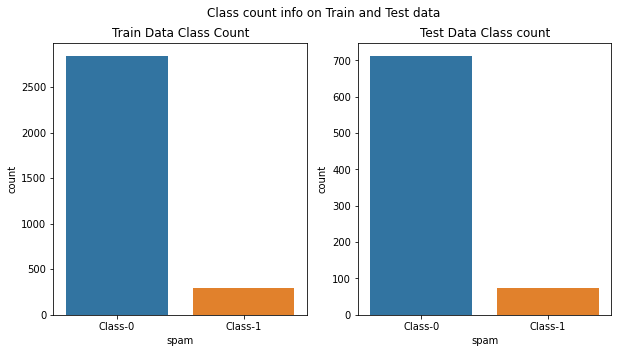

In [402]:
# visualize the target variable for class imbalance for Train and Test Data
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax1, ax2 = axes
sns.countplot(spam_class_train_data_tf['spam'],  ax=ax1)
sns.countplot(spam_class_test_data_tf['spam'],  ax=ax2)
ax1.set_title('Train Data Class Count')
ax1.xaxis.set_ticklabels(['Class-0','Class-1'])
ax2.set_title('Test Data Class count')
ax2.xaxis.set_ticklabels(['Class-0','Class-1'])
fig.suptitle('Class count info on Train and Test data')

We can see the dataset is highly imbalance and various classifier would predict class-0 with high accuracy totally ignoring the class-1. To avoid such situation we need to balance the data using various technique available.

In [403]:
# class count
spam_class_0_count, spam_class_1_count = spam_class_train_data_tf['spam'].value_counts()
print(spam_class_0_count , spam_class_1_count)
# Separate class
spam_class_0 = spam_class_train_data_tf[spam_class_train_data_tf['spam'] == 0]
spam_class_1 = spam_class_train_data_tf[spam_class_train_data_tf['spam'] == 1]
# print the shape of the class
print('Spam class 0:', spam_class_0.shape)
print('Spam class 1:', spam_class_1.shape)

2842 294
Spam class 0: (2842, 20)
Spam class 1: (294, 20)


We will use the Synthetic Minority Oversampling Technique (SMOTE) to generates synthetic data for the minority class.SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

SMOTE algorithm works in 4 simple steps:
1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

In [404]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter
y_train_counter = Counter(y_train.ravel())
print('Original train dataset shape: : ', y_train_counter)
smote = SMOTE(random_state=0)

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resample train dataset shape', Counter(y_train_smote))


Original train dataset shape: :  Counter({0: 2842, 1: 294})
Resample train dataset shape Counter({0: 2842, 1: 2842})


In [405]:
y_test_counter = Counter(y_test.ravel())
print('Original test dataset shape', y_test_counter)
smote = SMOTE(random_state=0)

# fit predictor and target variable
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print('Resample test dataset shape', Counter(y_test_smote))

n_train_smote = len(X_train_smote)
n_test_smote = len(X_test_smote)

print(n_train_smote,n_test_smote)

Original test dataset shape Counter({0: 712, 1: 73})
Resample test dataset shape Counter({1: 712, 0: 712})
5684 1424


With above we see that we have balanced both the train and test dataset.

##**(b) For each of the following classification methods, build a classification model using the training data:**

### **Creating some common utilities function**

In [406]:
#Creating some common function
#Creating Function for plotting the confusion Matrix
def plot_confusion_matrix(p_y_train, p_y_train_predictions, p_y_test, p_y_test_predictions):
          
    #Lets Calculate the confusion Matrix
    from sklearn.metrics import confusion_matrix
    train_conf_matrix = confusion_matrix(p_y_train,p_y_train_predictions)
    test_conf_matrix = confusion_matrix(p_y_test,p_y_test_predictions)
    print('\033[1m' + '\033[36m' +   "Train confusion matrix: \n" , train_conf_matrix , '\033[0m')
    print('\033[1m'+ '\033[92m' +  "Test confusion matrix: \n"  , test_conf_matrix,  '\033[0m')
    
    #Plotting the confusion matrix for better interpretation
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax1, ax2 = axes
    sns.heatmap(train_conf_matrix, annot=True, fmt='g', ax=ax1)
    sns.heatmap(test_conf_matrix, annot=True, fmt='g', ax=ax2)
    ax1.set_title('Train Data')
    ax1.xaxis.set_ticklabels(['0', '1'])
    ax1.yaxis.set_ticklabels(['0', '1'])
    ax2.set_title('Test Data')
    ax2.xaxis.set_ticklabels(['0', '1'])
    ax2.yaxis.set_ticklabels(['0', '1'])
    fig.suptitle('Confusion Matrix')

def print_classification_report(p_y_train, p_y_train_predictions, p_y_test, p_y_test_predictions):
    from sklearn.metrics import classification_report
    train_class_rpt = classification_report(p_y_train, p_y_train_predictions)
    print('\033[1m' + "======================================================" + '\033[0m')
    print('\033[1m' + '\033[36m' + '\033[4m'+  "Train Classification Report:" + '\033[0m' )
    print('\033[1m'+ '\033[36m' + train_class_rpt + '\033[0m')
    print('\033[1m' + "======================================================" + '\033[0m')
    test_class_rpt = classification_report(p_y_test, p_y_test_predictions)
    print('\033[1m'+ '\033[92m' + '\033[4m'+  "Test Classification Report:" + '\033[0m')
    print('\033[1m'+ '\033[92m' + test_class_rpt + '\033[0m')
    print('\033[1m' + "======================================================" + '\033[0m')

def print_shape_type_of_dataset(x_train,x_test,y_train, y_test):
    print('X train Dataset Shape: ',x_train.shape , 'Type of X train dataset: ', type(x_train) )
    print('X test Dataset Shape: ',x_test.shape , 'Type of X Test dataset: ', type(x_test) ) 
    print('Y train Dataset Shape: ',y_train.shape , 'Type of Y train dataset: ', type(y_train) )
    print('Y test Dataset Shape: ',y_test.shape , 'Type of Y test dataset: ', type(x_test) )

def print_bold(text):
    print('\033[1m' + '\033[95m' + text +' \n' + '\033[0m')

### **b.i) Implementing the Naive Bayes Classifier**

In [407]:
#print the type and data shape of dataset
print_shape_type_of_dataset(X_train, X_test, y_train, y_test)

X train Dataset Shape:  (3136, 19) Type of X train dataset:  <class 'pandas.core.frame.DataFrame'>
X test Dataset Shape:  (785, 19) Type of X Test dataset:  <class 'pandas.core.frame.DataFrame'>
Y train Dataset Shape:  (3136,) Type of Y train dataset:  <class 'pandas.core.series.Series'>
Y test Dataset Shape:  (785,) Type of Y test dataset:  <class 'pandas.core.frame.DataFrame'>


In [408]:
#Hyper parameter tunning for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=1.0)


In [409]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(X_train, y_train) #fit the model using the training data

y_train_predicted_nb = nb_model.predict(X_train)
y_test_predicted_nb = nb_model.predict(X_test)

**GaussianNB(priors, var_smoothing=1)** command in *scikit-learn* package uses the following parameters:


*   *priors* as probabilities of the classes. (If specified the priors are not adjusted according to the data.)
*   *var_smoothing* is the portion of the largest variance of all features that is added to variances for calculation stability.

Naive Bayes Classifier statistics: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2842
           1       0.29      0.14      0.18       294

    accuracy                           0.89      3136
   macro avg       0.60      0.55      0.56      3136
weighted avg       0.86      0.89      0.87      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       712
           1       0.46      0.30      0.36        73

    accuracy                           0.90       785
   macro avg       0.69      0.63      0.66       785
weighted avg       0.89      0.90      0.89       785

Train confusion matrix: 
 [[2743   99]
 [ 254   40]] 
Test confusion matrix: 
 [[686  26]
 [ 51  22]] 


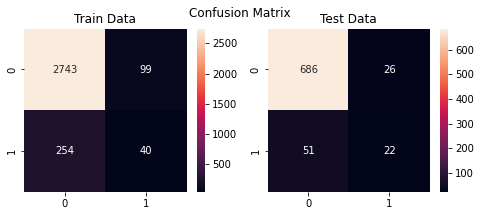

In [410]:
print_bold('Naive Bayes Classifier statistics:')
print_classification_report(y_train,y_train_predicted_nb,y_test,y_test_predicted_nb)
plot_confusion_matrix( y_train,y_train_predicted_nb,y_test,y_test_predicted_nb)

**Lets calculate the prediction using the class balanced Data**

Shape of X Class Balanced:  (5684, 19)
Shape of y Class Balanced:  (5684,)

Naive Bayes Classifier statistics with Class Balanced Dataset:
 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      2842
           1       0.69      0.96      0.80      2842

    accuracy                           0.77      5684
   macro avg       0.81      0.77      0.76      5684
weighted avg       0.81      0.77      0.76      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       712
           1       0.71      0.96      0.82       712

    accuracy                           0.79      1424
   macro avg       0.82      0.79      0.78      1424
weighted avg       0.82      0.79      0.78      1424

Train confusion matrix: 
 [[1632 1210]
 [ 120 2722]] 
Test confusion matrix: 
 [[439 273]
 [ 31 681]] 


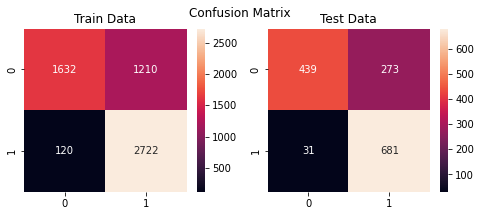

In [411]:
print("Shape of X Class Balanced: ", X_train_smote.shape)
print("Shape of y Class Balanced: ", y_train_smote.shape)

nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(X_train_smote, y_train_smote) #fit the model using the training class balanced data

y_train_predicted_nb_bal = nb_model.predict(X_train_smote)
y_test_predicted_nb_bal = nb_model.predict(X_test_smote)
print_bold('\nNaive Bayes Classifier statistics with Class Balanced Dataset:\n')
print_classification_report(y_train_smote,y_train_predicted_nb_bal , y_test_smote, y_test_predicted_nb_bal)
plot_confusion_matrix(y_train_smote,y_train_predicted_nb_bal , y_test_smote, y_test_predicted_nb_bal)

**Plot Correlation heat Map:**



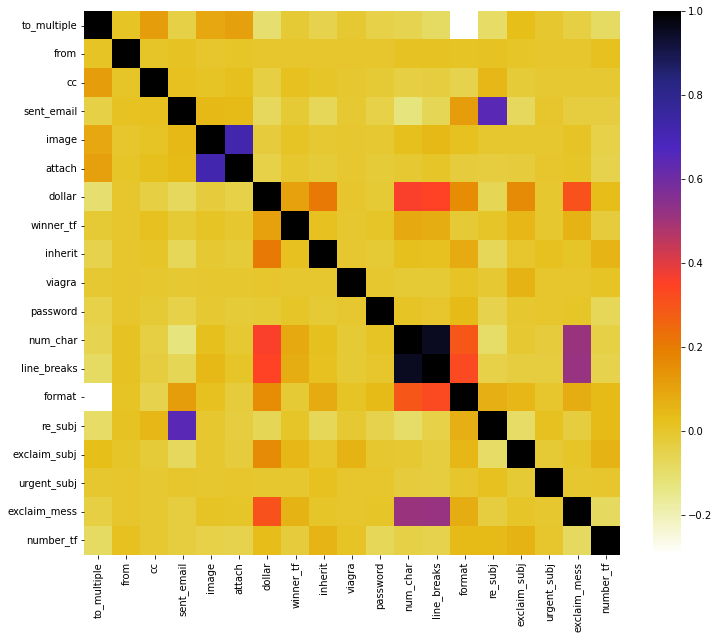

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

**Implement Naive bayes on reduced feature train and test data**

Analysis of the heat map suggest that not all column are correlated to each except num_char and line_breaks.
Since Naive Bayes assume that feature(x varibale column) should not be correlated. So we are just dropping the correlated column to check if model give better performance.

In [413]:
#Dropping line_breaks features from the train data
train_X_df = X_train.copy()
train_X_df= train_X_df.drop(['line_breaks'], axis=1)
print(train_X_df)

#Dropping  line_breaks features from the test data

test_X_df = X_test.copy()
test_X_df= test_X_df.drop(['line_breaks'], axis=1)
print(test_X_df)

print("\nSee the number of feature has dropped from 19 to 18\n")

#Convert the reduced train and test data into numpy array
train_X_reduced = train_X_df.to_numpy()
print('Shape of Reduced Train Dataset :', np.shape(train_X_reduced))
test_X_reduced = test_X_df.to_numpy()
print('Shape of Reduced Test Dataset :', np.shape(test_X_reduced))


      to_multiple  from  cc  ...  urgent_subj  exclaim_mess  number_tf
0               0     1   0  ...            0             0          0
1               0     1   0  ...            0             1          2
2               0     1   0  ...            0            48          2
3               0     1   0  ...            0             1          1
4               0     1   0  ...            0             1          1
...           ...   ...  ..  ...          ...           ...        ...
3131            0     1   0  ...            0             3          2
3132            0     1   0  ...            0             0          0
3133            0     1   0  ...            0             0          2
3134            0     1   0  ...            0             1          2
3135            0     1   0  ...            0             0          2

[3136 rows x 18 columns]
     to_multiple  from  cc  ...  urgent_subj  exclaim_mess  number_tf
0              0     1   0  ...            0        

Naive Bayes Classifier statistics with reduced feature dataset: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2842
           1       0.29      0.01      0.01       294

    accuracy                           0.91      3136
   macro avg       0.60      0.50      0.48      3136
weighted avg       0.85      0.91      0.86      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.90       785
   macro avg       0.45      0.50      0.47       785
weighted avg       0.82      0.90      0.86       785

Train confusion matrix: 
 [[2837    5]
 [ 292    2]] 
Test confusion matrix: 
 [[710   2]
 [ 73   0]] 


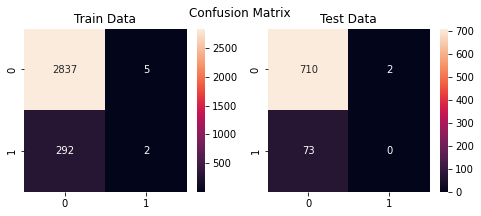

In [414]:
#Implement Naive bayes on reduced train and test data
nb_reduced_model = GaussianNB(var_smoothing=1.0)
nb_reduced_model.fit(train_X_reduced, y_train)

predicted_train_reduced_y = nb_reduced_model.predict(train_X_reduced)
predicted_test_reduced_y = nb_reduced_model.predict(test_X_reduced)

print_bold("Naive Bayes Classifier statistics with reduced feature dataset:")
print_classification_report(y_train,predicted_train_reduced_y, y_test, predicted_test_reduced_y)
plot_confusion_matrix(y_train,predicted_train_reduced_y, y_test, predicted_test_reduced_y)

Conclusion :  Reducing the fetaure have hardly any effect on the accurary prediction.

### **b.ii) Implementing the Logistic Regresssion Model**

In [415]:
#Let us now compute the size of train and test data
n_train_lrm = len(spam_class_train_data_tf.index) #number of data points in the data set
print('number of data points in the train data set:',n_train_lrm)
n_test_lrm = len(spam_class_test_data_tf.index) #number of data points in the data set
print('number of data points in the test data set:',n_test_lrm)

#extract the predictor variable columns(X variables) from train and test data.
X_train_lrm = spam_class_train_data_tf[spam_class_train_data_tf.columns[1:20]]
y_train_lrm = spam_class_train_data_tf[spam_class_train_data_tf.columns[0]]
X_test_lrm = spam_class_test_data_tf[spam_class_test_data_tf.columns[1:20]]
y_test_lrm = spam_class_test_data_tf[spam_class_test_data_tf.columns[0]]

number of data points in the train data set: 3136
number of data points in the test data set: 785


**Hyperparameter Tunning**

In [416]:
#HyperParameter Tunning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
solvers = ['newton-cg','lbfgs','liblinear']
c_values = np.array([1e6,1e3,100,10,1.0,0.1,0.01])
best_c_value = {}
cv_k = 5 #5-fold cross validation
for solver in solvers:
  avg_score = np.zeros(len(c_values))
  # print (avg_score)
  for c_value in c_values:
    clf_lr = LogisticRegression(solver = solver, C = c_value, max_iter=100000, random_state=0)
    scores = cross_val_score(clf_lr, X_train_lrm, y_train_lrm.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(c_values==c_value)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_c_value[solver] = c_values[int(max_score_index)]

print ('Best C value = ', best_c_value)

Best C value =  {'newton-cg': 1000.0, 'lbfgs': 100.0, 'liblinear': 1000.0}


In [417]:
#Train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'lbfgs', C=100, max_iter=100000, random_state=0)
logmodel.fit(X_train_lrm, y_train_lrm)

#Predict the y test
y_train_predictions_lrm = logmodel.predict(X_train_lrm)
y_test_predictions_lrm = logmodel.predict(X_test_lrm)

**Metrics	Definition:**

**Precision**: Precision is defined as the ratio of true positives to the sum of true and false positives.

**Recall**:Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score**:	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support**: Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

Logistic Regression model statistics with original dataset:

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2842
           1       0.63      0.15      0.24       294

    accuracy                           0.91      3136
   macro avg       0.78      0.57      0.60      3136
weighted avg       0.89      0.91      0.89      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       712
           1       0.76      0.30      0.43        73

    accuracy                           0.93       785
   macro avg       0.85      0.65      0.70       785
weighted avg       0.92      0.93      0.91       785

Train Accuracy: 0.9119897959183674
Test Accuracy: 0.9261146496815287

Train confusion matrix: 
 [[2817   25]
 [ 251   43]] 
Test confusion matrix: 
 [[705   7]
 [ 51  22]] 


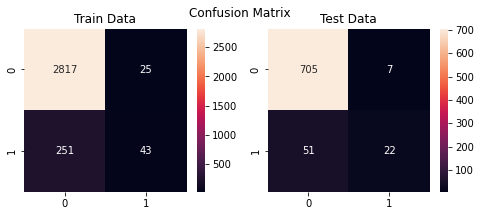

In [418]:
print('Logistic Regression model statistics with original dataset:\n')
#Print Classificatin Report and confusion matrix
print_classification_report(y_train_lrm,y_train_predictions_lrm,y_test_lrm, y_test_predictions_lrm )

#Average accuracy on training data
print('Train Accuracy:', logmodel.score(X_train_lrm,y_train_lrm))

#Calculating the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy_rm = accuracy_score(y_test_lrm, y_test_predictions_lrm)
print('Test Accuracy:', test_accuracy_rm) #Average accuracy on test data
print('=============================\n')

plot_confusion_matrix(y_train_lrm,y_train_predictions_lrm,y_test_lrm, y_test_predictions_lrm )

**Implement logistic Regression using class balance dataset**

In [419]:
#implement logistic Regression using class balance data
#Train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'lbfgs', C=100, max_iter=100000, random_state=0)
logmodel.fit(X_train_smote, y_train_smote)

#Predict the y test
y_train_predictions_bal_lrm = logmodel.predict(X_train_smote)
y_test_predictions_bal_lrm = logmodel.predict(X_test_smote)


Logistic Regression Model with Class Balanced Dataset: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2842
           1       0.81      0.90      0.86      2842

    accuracy                           0.85      5684
   macro avg       0.85      0.85      0.85      5684
weighted avg       0.85      0.85      0.85      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       712
           1       0.80      0.84      0.82       712

    accuracy                           0.81      1424
   macro avg       0.81      0.81      0.81      1424
weighted avg       0.81      0.81      0.81      1424

Train confusion matrix: 
 [[2257  585]
 [ 277 2565]] 
Test confusion matrix: 
 [[560 152]
 [113 599]] 


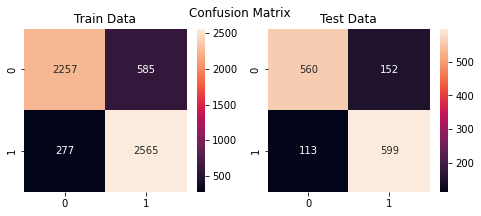

In [420]:
print_bold('Logistic Regression Model with Class Balanced Dataset:')
print_classification_report(y_train_smote,y_train_predictions_bal_lrm,y_test_smote, y_test_predictions_bal_lrm )
plot_confusion_matrix(y_train_smote,y_train_predictions_bal_lrm,y_test_smote, y_test_predictions_bal_lrm )

### **=================================================================**

### **b.iii) Implementing the Soft Margin SVM**

In [421]:
from sklearn.svm import LinearSVC #linear svm from scikit learn 
#copy some variable for SVM perspective
train_label= y_train_smote.copy()
train_features = X_train_smote.copy()
test_features = X_test_smote.copy()
test_label = y_test_smote.copy()
num_train = n_train_smote
num_test = n_test_smote

train_label = train_label.to_frame(name='spam')
test_label = test_label.to_frame(name='spam')

train_label = train_label.to_numpy()
train_features = train_features.to_numpy()
test_features= test_features.to_numpy()
test_label = test_label.to_numpy()

print_shape_type_of_dataset(train_features,test_features,train_label, test_label)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'numpy.ndarray'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'numpy.ndarray'>
Y train Dataset Shape:  (5684, 1) Type of Y train dataset:  <class 'numpy.ndarray'>
Y test Dataset Shape:  (1424, 1) Type of Y test dataset:  <class 'numpy.ndarray'>


In [422]:
#Hyperparameter tunning
from sklearn import svm
from sklearn.svm import LinearSVC #linear svm from scikit learn 

c_values = np.array([1e6,1e3,100,10,1.0,0.1,0.01,0.001])
best_c_value = []
cv_k = 5 #5-fold cross validation
avg_score = np.zeros(len(c_values))
for c_value in c_values:
  clf_svm = LinearSVC(C = c_value, max_iter=10000, random_state=0, tol=1e-5,verbose=0 )
  scores = cross_val_score(clf_svm, train_features, train_label.ravel(), cv=cv_k) 
  avg_score[np.where(c_values==c_value)] = np.mean(scores)

  max_score_index = np.argmax(avg_score)
  
  best_c_value = c_values[int(max_score_index)]

print ('Best C value = ', best_c_value)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Best C value =  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [423]:
#Get the trained model in clf_model
train_label = np.reshape(train_label,(train_label.shape[0],))
clf = LinearSVC(C=0.01,random_state=0, tol=1e-5, max_iter=100000) #max_iter=10000
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_test_labels = clf_model.predict(test_features)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [424]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_test_labels = np.reshape(predicted_test_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
# print(predicted_test_labels)

#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_test_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('Test set accuracy:', test_accuracy)   

Test set accuracy: 91.0814606741573


In [425]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy
train_label = np.reshape(train_label,(num_train,1))
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the train set accuracy
print('Train set accuracy:', train_accuracy)

Train set accuracy: 91.89831104855736


Soft Margin SVM Statistics with balanced dataset: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2842
           1       0.79      0.93      0.85      2842

    accuracy                           0.84      5684
   macro avg       0.85      0.84      0.84      5684
weighted avg       0.85      0.84      0.84      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       712
           1       0.77      0.91      0.84       712

    accuracy                           0.82      1424
   macro avg       0.83      0.82      0.82      1424
weighted avg       0.83      0.82      0.82      1424

Train confusion matrix: 
 [[2121  721]
 [ 200 2642]] 
Test confusion matrix: 
 [[520 192]
 [ 62 650]] 


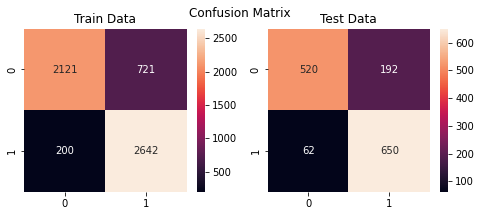

In [426]:
print_bold('Soft Margin SVM Statistics with balanced dataset:')
print_classification_report(train_label, predicted_train_labels,test_label, predicted_test_labels)
plot_confusion_matrix(train_label, predicted_train_labels,test_label, predicted_test_labels)


### **=============================================================**

### **b.iv) Implementing Descision Tree Classification**

Here we will implement the decision Tree classifier

In [427]:
#import the decision tree from scikit learn 
from sklearn import tree
from sklearn.model_selection import cross_val_score 

#copy some variable for SVM perspective
train_label= y_train_smote.copy()
train_features = X_train_smote.copy()
test_features = X_test_smote.copy()
test_label = y_test_smote.copy()
num_train = n_train_smote
num_test = n_test_smote

train_label = train_label.to_frame(name='spam')
test_label = test_label.to_frame(name='spam')

train_label = train_label.to_numpy()
train_features = train_features.to_numpy()
test_features= test_features.to_numpy()
test_label = test_label.to_numpy()

print('train_label:', train_label.shape, 'Type: ', type(train_label))
print('train_features:', train_features.shape ,'Type: ',  type(train_features))
print('test_features:', test_features.shape ,'Type: ',  type(test_features))
print('test_label:', test_label.shape,'Type: ',  type(test_label))

train_label: (5684, 1) Type:  <class 'numpy.ndarray'>
train_features: (5684, 19) Type:  <class 'numpy.ndarray'>
test_features: (1424, 19) Type:  <class 'numpy.ndarray'>
test_label: (1424, 1) Type:  <class 'numpy.ndarray'>


In [428]:
#Lets tune the best depth by tuning some hyperparameter
criteria = ['entropy', 'gini']
max_depth = np.array([1,2,3,5,10,15,20,25])
best_depth = {}
cv_k = 5 #5-fold cross validation
for criterion in criteria:
  avg_score = np.zeros(len(max_depth))
  
  for depth in max_depth:
    clf_dt = tree.DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=0)
    scores = cross_val_score(clf_dt, train_features , train_label.ravel(), cv=cv_k) 
    
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  print('Criterion:', criterion)
  print ('Avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  
  best_depth[criterion] = max_depth[int(max_score_index)]

print ('Best hyperparameter for tree depth = ', best_depth)

Criterion: entropy
Avg score [0.64689819 0.76424787 0.84306304 0.86558261 0.89144648 0.91642898
 0.91871508 0.91818738]
Criterion: gini
Avg score [0.71463451 0.81016714 0.83725721 0.86030386 0.89373304 0.91114884
 0.91466703 0.91255652]
Best hyperparameter for tree depth =  {'entropy': 20, 'gini': 20}


In [429]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
#train using decision tree classifier and plot the resultant decision tree
# tree.plot_tree(clf.fit(train_features, train_label))  

In [430]:
#Get the trained model in clf_model
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_test_labels = clf_model.predict(test_features)

#reshaping predicted_labels so that it is of the same shape as test_label
predicted_test_labels = np.reshape(predicted_test_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_test_labels)

In [431]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy 
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the test set accuracy 
print('Train set accuracy:', train_accuracy)

Train set accuracy: 99.75369458128078


In [432]:
#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_test_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('Test set accuracy:', test_accuracy)

Test set accuracy: 92.31039325842697


Decision Tree Statistics with balanced dataset: 

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2842
           1       0.99      1.00      1.00      2842

    accuracy                           1.00      5684
   macro avg       1.00      1.00      1.00      5684
weighted avg       1.00      1.00      1.00      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       712
           1       0.90      0.78      0.83       712

    accuracy                           0.85      1424
   macro avg       0.85      0.85      0.85      1424
weighted avg       0.85      0.85      0.85      1424

Train confusion matrix: 
 [[2823   19]
 [   9 2833]] 
Test confusion matrix: 
 [[652  60]
 [159 553]] 


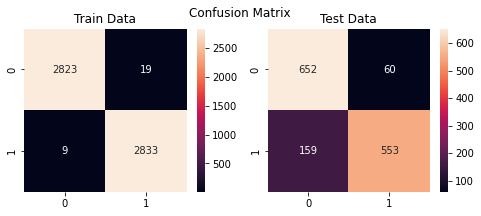

In [433]:
print_bold('Decision Tree Statistics with balanced dataset:')
print_classification_report(train_label, predicted_train_labels,test_label, predicted_test_labels)
plot_confusion_matrix(train_label, predicted_train_labels,test_label, predicted_test_labels)


### **=============================================================**

### **b.v) Implementing Random Forest Classification**

In [434]:
X_train = X_train_smote.copy()
y_train = y_train_smote.copy()
X_test = X_test_smote.copy()
y_test = y_test_smote.copy()

print_shape_type_of_dataset(X_train,X_test,y_train,y_test)

num_features = X_train.shape[1]
print('No of Feature:', num_features)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'pandas.core.frame.DataFrame'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'pandas.core.frame.DataFrame'>
Y train Dataset Shape:  (5684,) Type of Y train dataset:  <class 'pandas.core.series.Series'>
Y test Dataset Shape:  (1424,) Type of Y test dataset:  <class 'pandas.core.frame.DataFrame'>
No of Feature: 19


In [435]:
#Let us now use cross validation to find random forest hyperparameters.
# We will first find best max depths for a given set of estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
import numpy as np

num_features = X_train.shape[1]
estimators = [5, 10,50,100,150,200]
constant = math.sqrt(num_features)
max_depth = constant*np.array([0.25,0.5, 0.75,1,1.25,1.50,1.75,2])
max_depth = np.ceil(max_depth)
print ('maximum depth', max_depth)
best_depth = {}
cv_k = 5 #5-fold cross validation
for n_estimate in estimators:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, X_train, y_train.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_depth[n_estimate] = max_depth[int(max_score_index)]

print ('maximum depth = ', best_depth)

maximum depth [2. 3. 4. 5. 6. 7. 8. 9.]
maximum depth =  {5: 9.0, 10: 9.0, 50: 9.0, 100: 9.0, 150: 9.0, 200: 9.0}


In [436]:
## Now let's find the number of estimators
avg_score = np.zeros(len(estimators))
# print (estimators)
for n_estimate in estimators:
    depth = best_depth[n_estimate]
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, X_train, y_train.ravel(), cv=cv_k) 
    avg_score[estimators.index(n_estimate)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_estimator = estimators[max_score_index]
best_max_depth = best_depth[best_estimator]
print ('Number of estimators = ',best_estimator)
print ('maximum depth =',best_max_depth)

avg score = [0.89127089 0.89567013 0.89918677 0.89918599 0.8990104  0.89830679]
Number of estimators =  50
maximum depth = 9.0


In [437]:
# train and test accuracy using random forest classifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(n_estimators = best_estimator,max_depth = best_max_depth,  random_state=0)
clf_model = clf_rf.fit(X_train, y_train)
train_y_predicted = clf_model.predict(X_train)
train_acc_rf = accuracy_score(y_train, train_y_predicted)
test_y_predicted = clf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, test_y_predicted)
print('Train accuracy from Random forest:', train_acc_rf)
print('Test accuracy from Random forest:', test_acc_rf)

Train accuracy from Random forest: 0.9108022519352569
Test accuracy from Random forest: 0.8658707865168539


In [438]:
## We will first find the appropriate max depth of decision tree using cross validation.
from sklearn import tree #decision tree from scikit learn 

avg_score = np.zeros(len(max_depth))
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    scores = cross_val_score(clf, X_train, y_train, cv=cv_k) 
    avg_score[np.where(max_depth == depth)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_max_depth = max_depth[max_score_index]
print ('maximum depth =',best_max_depth)

avg score = [0.76424787 0.84306304 0.86083234 0.86558261 0.86628591 0.87649083
 0.88476083 0.88687196]
maximum depth = 9.0


In [439]:
# train and test accuracy using decision tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=best_max_depth)
clf_model = clf.fit(X_train, y_train)
train_y_predicted = clf_model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_predicted)
test_y_predicted = clf_model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_predicted)
print('Train accuracy from decision tree:', train_acc)
print('Test accuracy from decision tree:', test_acc)
print ('##############')
print('Train accuracy from Random forest:', train_acc_rf)
print('Test accuracy from Random forest:', test_acc_rf)

Train accuracy from decision tree: 0.9046446164672766
Test accuracy from decision tree: 0.8300561797752809
##############
Train accuracy from Random forest: 0.9108022519352569
Test accuracy from Random forest: 0.8658707865168539


Random Forest Classifier Statistics with balanced dataset: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2842
           1       0.88      0.94      0.91      2842

    accuracy                           0.90      5684
   macro avg       0.91      0.90      0.90      5684
weighted avg       0.91      0.90      0.90      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       712
           1       0.83      0.84      0.83       712

    accuracy                           0.83      1424
   macro avg       0.83      0.83      0.83      1424
weighted avg       0.83      0.83      0.83      1424

Train confusion matrix: 
 [[2484  358]
 [ 184 2658]] 
Test confusion matrix: 
 [[586 126]
 [116 596]] 


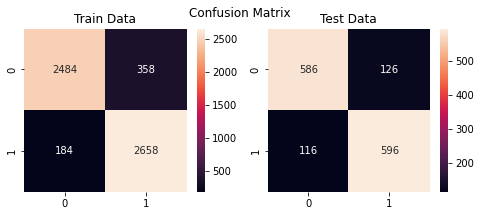

In [440]:
print_bold('Random Forest Classifier Statistics with balanced dataset:')
print_classification_report(y_train,train_y_predicted,y_test,test_y_predicted)
plot_confusion_matrix(y_train,train_y_predicted,y_test,test_y_predicted)

### **=============================================================**

### **b.vi) Implementing Kernel Machine Classification**

To train the kernel SVM, we use the same SVC class of the Scikit-Learn's svm library. The difference lies in the value for the kernel parameter of the SVC class. In the case of the simple SVM we used "linear" as the value for the kernel parameter. However, for kernel SVM you can use Gaussian, polynomial, sigmoid, or computable kernel. We will implement polynomial, Gaussian, and sigmoid kernels to see which one works better for our problem.

In [441]:
X_train = X_train_smote.copy()
y_train = y_train_smote.copy()
X_test = X_test_smote.copy()
y_test = y_test_smote.copy()

print('shape of train data features:',X_train.shape)
print('shape of train data labels',y_train.shape)
print('shape of test data features:',X_test.shape)
print('shape of test data labels', y_test.shape)

num_features = X_train.shape[1]
print('No of Feature:', num_features)

shape of train data features: (5684, 19)
shape of train data labels (5684,)
shape of test data features: (1424, 19)
shape of test data labels (1424,)
No of Feature: 19


In [442]:
#Finding the best Hyperparameter
from sklearn.svm import SVC

gammas = [0.0001,0.001, 0.01, 0.1, 1,2, 3,5, 20, 40, 60, 80, 100]
kernels = ['sigmoid','rbf'] 
best_gamma = {}
cv_k = 5 #5-fold cross validation
for i_kernel in kernels:
  print ('kernel :',i_kernel)
  avg_score = np.zeros(len(gammas))
  for i_gamma in gammas:
    clf = SVC(kernel=i_kernel, gamma=i_gamma, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv=cv_k) 
    avg_score[gammas.index(i_gamma)] = np.mean(scores)
   
  print ('Average_score:', avg_score)
  max_score_index = np.argmax(avg_score)
 
  best_gamma[i_kernel] = gammas[int(max_score_index)]

print ('Best hyper-parameters for Kernel Machine = ', best_gamma)

kernel : sigmoid
Average_score: [0.61171572 0.70742208 0.37127495 0.38335284 0.49647918 0.49647918
 0.49331017 0.49894397 0.4996482  0.4996482  0.4996482  0.4996482
 0.4996482 ]
kernel : rbf
Average_score: [0.74823944 0.79045998 0.86030665 0.89496466 0.89514568 0.87368105
 0.87280123 0.87121781 0.86505986 0.86013369 0.85591144 0.85204067
 0.84957805]
Best hyper-parameters for Kernel Machine =  {'sigmoid': 0.001, 'rbf': 1}


Kernel Machine Classifier Statistics with balanced dataset with rbf kernel: 

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2842
           1       0.97      1.00      0.99      2842

    accuracy                           0.98      5684
   macro avg       0.99      0.98      0.98      5684
weighted avg       0.99      0.98      0.98      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       712
           1       0.91      0.49      0.64       712

    accuracy                           0.72      1424
   macro avg       0.78      0.72      0.70      1424
weighted avg       0.78      0.72      0.70      1424

Train confusion matrix: 
 [[2765   77]
 [   9 2833]] 
Test confusion matrix: 
 [[677  35]
 [364 348]] 


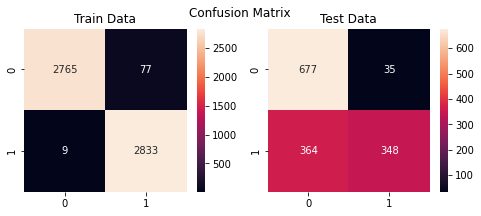

In [443]:
#Implement Gaussian Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',gamma=1, max_iter = 10000, random_state = 0 )
svclassifier.fit(X_train, y_train)

y_test_pred_rbf = svclassifier.predict(X_test)
y_train_pred_rbf = svclassifier.predict(X_train)

print_bold('Kernel Machine Classifier Statistics with balanced dataset with rbf kernel:')
print_classification_report(y_train,y_train_pred_rbf, y_test ,y_test_pred_rbf  )
plot_confusion_matrix(y_train,y_train_pred_rbf, y_test ,y_test_pred_rbf )

Kernel Machine Classifier Statistics with balanced dataset with sigmoid kernel: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2842
           1       0.71      0.71      0.71      2842

    accuracy                           0.71      5684
   macro avg       0.71      0.71      0.71      5684
weighted avg       0.71      0.71      0.71      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       712
           1       0.72      0.79      0.75       712

    accuracy                           0.74      1424
   macro avg       0.74      0.74      0.74      1424
weighted avg       0.74      0.74      0.74      1424

Train confusion matrix: 
 [[2015  827]
 [ 828 2014]] 
Test confusion matrix: 
 [[489 223]
 [146 566]] 


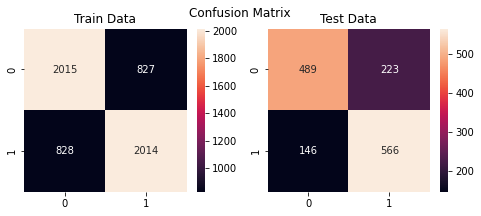

In [444]:
#implement Sigmoid Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', gamma= 0.001,max_iter = 10000, random_state = 0)
svclassifier.fit(X_train, y_train)

y_test_pred_sig = svclassifier.predict(X_test)
y_train_pred_sig = svclassifier.predict(X_train)

print_bold('Kernel Machine Classifier Statistics with balanced dataset with sigmoid kernel:')
print_classification_report(y_train,y_train_pred_sig, y_test ,y_test_pred_sig  )
plot_confusion_matrix(y_train,y_train_pred_sig, y_test ,y_test_pred_sig )

##**(f) [C, R] Design a suitable normalization scheme so that the attributes cc,num char, line breaks and exclaim mess are scaled between 0 and 1 in both train and test data sets. Explain the normalization scheme you designed. Rebuild the classification models with this modified data set and compare the performance metrics obtained for this modified data set with those obtained before. Using the comparison, comment whether normalization helps in improving the performance metrics for the test data set for each classification method.**


Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:


$
\begin{align}
X' = \frac{X - X_{min}}{X_{max} - X_{min}}.
\end{align}
$


Normalization equation

Here, $X_{max}$ and $X_{min}$ are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

In [445]:
X_train_q3f = X_train_smote.copy()
X_test_q3f = X_test_smote.copy()
y_train_q3f = y_train_smote.copy()
y_test_q3f = y_test_smote.copy()

In [446]:
X_train_q3f.describe()

,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
count,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.00000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000
mean,0.095883,0.995954,0.331281,0.146904,0.023751,0.147607,1.04627,0.011436,0.029557,0.004926,0.063512,8.639753,180.134412,0.532372,0.140042,0.045039,0.001232,7.732759,1.423293
std,0.294457,0.063488,2.271444,0.354041,0.328641,0.664734,3.97752,0.106334,0.289117,0.152325,0.767783,15.455489,326.609485,0.498995,0.347061,0.207407,0.035075,67.447942,0.717734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.734126,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.599152,56.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,11.346250,197.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,1.000000,1.000000,64.000000,1.000000,20.000000,21.000000,64.00000,1.000000,9.000000,8.000000,28.000000,190.087000,4022.000000,1.000000,1.000000,1.000000,1.000000,1236.000000,2.000000


In [447]:
print('shape of train data features:',X_train_q3f.shape)
print('shape of train data labels',y_train_q3f.shape)
print('shape of test data features:',X_test_q3f.shape)
print('shape of test data labels', y_test_q3f.shape)

shape of train data features: (5684, 19)
shape of train data labels (5684,)
shape of test data features: (1424, 19)
shape of test data labels (1424,)


In [448]:
#attributes cc,num char, line breaks and exclaim mess are scaled between 0 and 1 in both train and test data sets
X_train_q3f.columns

Index(['to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach', 'dollar',
       'winner_tf', 'inherit', 'viagra', 'password', 'num_char', 'line_breaks',
       'format', 're_subj', 'exclaim_subj', 'urgent_subj', 'exclaim_mess',
       'number_tf'],
      dtype='object')

In [449]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train_q3f,)

# transform training data
X_train_norm = norm.transform(X_train_q3f)

# transform testing dataabs
X_test_norm = norm.transform(X_test_q3f)

In [450]:
#Train data normalization
X_train_norm = pd.DataFrame(X_train_norm,columns=['to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach', 'dollar',
       'winner_tf', 'inherit', 'viagra', 'password', 'num_char', 'line_breaks',
       'format', 're_subj', 'exclaim_subj', 'urgent_subj', 'exclaim_mess',
       'number_tf'])
X_train_norm.describe()

,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
count,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000
mean,0.095883,0.995954,0.005176,0.146904,0.001188,0.007029,0.016348,0.011436,0.003284,0.000616,0.002268,0.045447,0.044550,0.532372,0.140042,0.045039,0.001232,0.006256,0.711647
std,0.294457,0.063488,0.035491,0.354041,0.016432,0.031654,0.062149,0.106334,0.032124,0.019041,0.027421,0.081308,0.081226,0.498995,0.347061,0.207407,0.035075,0.054570,0.358867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003857,0.003979,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013668,0.013678,1.000000,0.000000,0.000000,0.000000,0.000809,1.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059685,0.048744,1.000000,0.000000,0.000000,0.000000,0.001618,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [451]:
# Test data normlization
X_test_norm = pd.DataFrame(X_test_norm,columns=['to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach', 'dollar',
       'winner_tf', 'inherit', 'viagra', 'password', 'num_char', 'line_breaks',
       'format', 're_subj', 'exclaim_subj', 'urgent_subj', 'exclaim_mess',
       'number_tf'])
X_test_norm.describe()

,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.0,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.0,1424.000000,1424.000000
mean,0.076545,0.988062,0.005344,0.179073,0.001931,0.009163,0.016338,0.018258,0.002965,0.0,0.002032,0.037316,0.037460,0.507725,0.164326,0.057584,0.0,0.003100,0.647472
std,0.265961,0.108646,0.035435,0.383548,0.018119,0.029151,0.071261,0.133932,0.024817,0.0,0.016354,0.063134,0.065482,0.500116,0.370701,0.233037,0.0,0.027962,0.391432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000011,0.000249,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.003784,0.004228,0.000000,0.000000,0.000000,0.0,0.000000,0.500000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011506,0.011191,1.000000,0.000000,0.000000,0.0,0.000000,0.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.043840,0.041345,1.000000,0.000000,0.000000,0.0,0.001618,1.000000
max,1.000000,1.000000,1.062500,1.000000,0.450000,0.428571,1.000000,1.000000,0.666667,0.0,0.214286,0.831687,0.864213,1.000000,1.000000,1.000000,0.0,0.973301,1.000000


If you see the Train and test data is normalized between 0 and 1. I took liberty to normalized all column in train and test data set. 

In [452]:
#copy the y varibale to have similar to x varibale name
y_train_norm = y_train_q3f.copy()
y_test_norm = y_test_q3f.copy()

In [453]:
#Shape and Type of data set
print_shape_type_of_dataset(X_train_norm,X_test_norm,y_train_norm,y_test_norm)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'pandas.core.frame.DataFrame'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'pandas.core.frame.DataFrame'>
Y train Dataset Shape:  (5684,) Type of Y train dataset:  <class 'pandas.core.series.Series'>
Y test Dataset Shape:  (1424,) Type of Y test dataset:  <class 'pandas.core.frame.DataFrame'>


**1. Naiver Bayes Classifier**

Naive Bayes Classifier statistics with Class Balanced Dataset: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      2842
           1       0.70      0.95      0.80      2842

    accuracy                           0.77      5684
   macro avg       0.81      0.77      0.76      5684
weighted avg       0.81      0.77      0.76      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       712
           1       0.72      0.95      0.82       712

    accuracy                           0.79      1424
   macro avg       0.82      0.79      0.78      1424
weighted avg       0.82      0.79      0.78      1424

Train confusion matrix: 
 [[1674 1168]
 [ 149 2693]] 
Test confusion matrix: 
 [[447 265]
 [ 38 674]] 


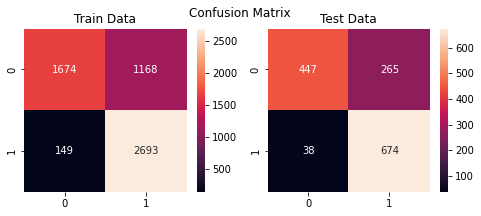

In [454]:

nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(X_train_norm, y_train_norm) #fit the model using the training class balanced data

y_train_predicted_nb_norm = nb_model.predict(X_train_norm)
y_test_predicted_nb_norm = nb_model.predict(X_test_norm)
print_bold('Naive Bayes Classifier statistics with Class Balanced Dataset:')
print_classification_report(y_train_norm,y_train_predicted_nb_norm , y_test_norm, y_test_predicted_nb_norm)
plot_confusion_matrix(y_train_norm,y_train_predicted_nb_norm , y_test_norm, y_test_predicted_nb_norm)

**2. Logistic Regresssion Model**

In [455]:
#implement logistic Regression using class balance data
#Train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1e6)
logmodel.fit(X_train_norm, y_train_norm)

#Predict the y test
y_train_predictions_lrm_norm = logmodel.predict(X_train_norm)
y_test_predictions_lrm_norm = logmodel.predict(X_test_norm)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Model with Class Balance Dataset and normalization: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2842
           1       0.81      0.90      0.85      2842

    accuracy                           0.84      5684
   macro avg       0.85      0.84      0.84      5684
weighted avg       0.85      0.84      0.84      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       712
           1       0.79      0.85      0.82       712

    accuracy                           0.82      1424
   macro avg       0.82      0.82      0.82      1424
weighted avg       0.82      0.82      0.82      1424

Train confusion matrix: 
 [[2223  619]
 [ 274 2568]] 
Test confusion matrix: 
 [[555 157]
 [105 607]] 


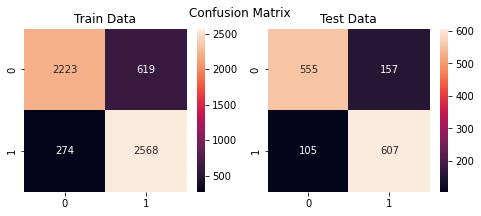

In [456]:

print_bold('Logistic Regression Model with Class Balance Dataset and normalization:')
print_classification_report(y_train_norm,y_train_predictions_lrm_norm,y_test_norm, y_test_predictions_lrm_norm )
plot_confusion_matrix(y_train_norm,y_train_predictions_lrm_norm,y_test_norm, y_test_predictions_lrm_norm )

**3. Soft Margin SVM**

In [457]:
from sklearn.svm import LinearSVC #linear svm from scikit learn 
clf = LinearSVC(random_state=0, tol=1e-5) #max_iter=10000
#copy some variable for SVM perspective
train_label= y_train_norm.copy()
train_features = X_train_norm.copy()
test_features = X_test_norm.copy()
test_label = y_test_norm.copy()
num_train_norm = n_train_smote
num_test_norm = n_test_smote

train_label = train_label.to_frame(name='spam')
test_label = test_label.to_frame(name='spam')

train_label = train_label.to_numpy()
train_features = train_features.to_numpy()
test_features= test_features.to_numpy()
test_label = test_label.to_numpy()

print_shape_type_of_dataset(train_features,test_features, train_label, test_label)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'numpy.ndarray'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'numpy.ndarray'>
Y train Dataset Shape:  (5684, 1) Type of Y train dataset:  <class 'numpy.ndarray'>
Y test Dataset Shape:  (1424, 1) Type of Y test dataset:  <class 'numpy.ndarray'>


In [458]:
#Get the trained model in clf_model
train_label = np.reshape(train_label,(train_label.shape[0],))
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_test_labels = clf_model.predict(test_features)

In [459]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_test_labels = np.reshape(predicted_test_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
# print(predicted_test_labels)

#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_test_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('Test set accuracy:', test_accuracy)

Test set accuracy: 91.29213483146067


In [460]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy
train_label = np.reshape(train_label,(num_train,1))
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the train set accuracy
print('Train set accuracy:', train_accuracy)

Train set accuracy: 92.47888810696692


Soft Margin SVM Statistics with balanced dataset and Normalization: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2842
           1       0.82      0.90      0.86      2842

    accuracy                           0.85      5684
   macro avg       0.85      0.85      0.85      5684
weighted avg       0.85      0.85      0.85      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       712
           1       0.80      0.86      0.83       712

    accuracy                           0.83      1424
   macro avg       0.83      0.83      0.83      1424
weighted avg       0.83      0.83      0.83      1424

Train confusion matrix: 
 [[2273  569]
 [ 286 2556]] 
Test confusion matrix: 
 [[561 151]
 [ 97 615]] 


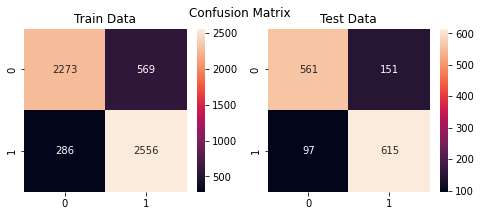

In [461]:
print_bold('Soft Margin SVM Statistics with balanced dataset and Normalization:')
print_classification_report(train_label, predicted_train_labels,test_label, predicted_test_labels)
plot_confusion_matrix(train_label, predicted_train_labels,test_label, predicted_test_labels)

**4. Descision Tree Classification**

In [462]:
#import the decision tree from scikit learn 
from sklearn import tree
from sklearn.model_selection import cross_val_score 

#copy some variable for SVM perspective
train_label= y_train_norm.copy()
train_features = X_train_smote.copy()
test_features = X_test_norm.copy()
test_label = y_test_norm.copy()
num_train = n_train_smote
num_test = n_test_smote

train_label = train_label.to_frame(name='spam')
test_label = test_label.to_frame(name='spam')

train_label = train_label.to_numpy()
train_features = train_features.to_numpy()
test_features= test_features.to_numpy()
test_label = test_label.to_numpy()

print_shape_type_of_dataset(train_features,test_features, train_label, test_label)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'numpy.ndarray'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'numpy.ndarray'>
Y train Dataset Shape:  (5684, 1) Type of Y train dataset:  <class 'numpy.ndarray'>
Y test Dataset Shape:  (1424, 1) Type of Y test dataset:  <class 'numpy.ndarray'>


In [463]:
#Lets tune the best depth by tuning some hyperparameter
criteria = ['entropy', 'gini']
max_depth = np.array([1,2,3,5,10,15,20,25])
best_depth = {}
cv_k = 5 #5-fold cross validation
for criterion in criteria:
  avg_score = np.zeros(len(max_depth))
  
  for depth in max_depth:
    clf_dt = tree.DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=0)
    scores = cross_val_score(clf_dt, train_features , train_label.ravel(), cv=cv_k) 
    
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  print('Criterion:', criterion)
  print ('Avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  
  best_depth[criterion] = max_depth[int(max_score_index)]

print ('Best hyperparameter for tree depth = ', best_depth)

Criterion: entropy
Avg score [0.64689819 0.76424787 0.84306304 0.86558261 0.89144648 0.91642898
 0.91871508 0.91818738]
Criterion: gini
Avg score [0.71463451 0.81016714 0.83725721 0.86030386 0.89373304 0.91114884
 0.91466703 0.91255652]
Best hyperparameter for tree depth =  {'entropy': 20, 'gini': 20}


In [464]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
#train using decision tree classifier and plot the resultant decision tree
# tree.plot_tree(clf.fit(train_features, train_label))

#Get the trained model in clf_model
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_test_labels = clf_model.predict(test_features)

#reshaping predicted_labels so that it is of the same shape as test_label
predicted_test_labels = np.reshape(predicted_test_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_test_labels)

#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy 
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the test set accuracy 
print('Train set accuracy:', train_accuracy)

#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_test_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('Test set accuracy:', test_accuracy)

Train set accuracy: 99.75369458128078
Test set accuracy: 79.1432584269663


Decision Tree Statistics with balanced dataset and normalization: 

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2842
           1       0.99      1.00      1.00      2842

    accuracy                           1.00      5684
   macro avg       1.00      1.00      1.00      5684
weighted avg       1.00      1.00      1.00      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       712
           1       0.58      0.63      0.60       712

    accuracy                           0.58      1424
   macro avg       0.58      0.58      0.58      1424
weighted avg       0.58      0.58      0.58      1424

Train confusion matrix: 
 [[2823   19]
 [   9 2833]] 
Test confusion matrix: 
 [[378 334]
 [260 452]] 


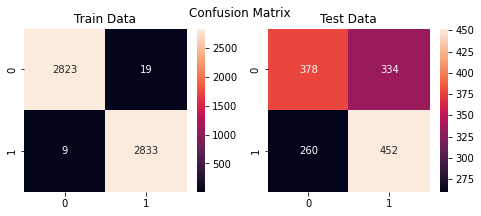

In [465]:
print_bold('Decision Tree Statistics with balanced dataset and normalization:')
print_classification_report(train_label, predicted_train_labels,test_label, predicted_test_labels)
plot_confusion_matrix(train_label, predicted_train_labels,test_label, predicted_test_labels)

**5. Random Forest Classification**

In [466]:
X_train = X_train_norm.copy()
y_train = y_train_norm.copy()
X_test = X_test_norm.copy()
y_test = y_test_norm.copy()


print_shape_type_of_dataset(X_train,X_test,y_train, y_test)

num_features = X_train.shape[1]
print('No of Feature:', num_features)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'pandas.core.frame.DataFrame'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'pandas.core.frame.DataFrame'>
Y train Dataset Shape:  (5684,) Type of Y train dataset:  <class 'pandas.core.series.Series'>
Y test Dataset Shape:  (1424,) Type of Y test dataset:  <class 'pandas.core.frame.DataFrame'>
No of Feature: 19


In [467]:
#Let us now use cross validation to find random forest hyperparameters.
# We will first find best max depths for a given set of estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
import numpy as np

num_features = X_train.shape[1]
estimators = [5, 10,50,100,150,200]
constant = math.sqrt(num_features)
max_depth = constant*np.array([0.25,0.5, 0.75,1,1.25,1.50,1.75,2])
max_depth = np.ceil(max_depth)
print ('maximum depth', max_depth)
best_depth = {}
cv_k = 5 #5-fold cross validation
for n_estimate in estimators:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, X_train, y_train.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_depth[n_estimate] = max_depth[int(max_score_index)]

print ('maximum depth = ', best_depth)

maximum depth [2. 3. 4. 5. 6. 7. 8. 9.]
maximum depth =  {5: 9.0, 10: 9.0, 50: 9.0, 100: 9.0, 150: 9.0, 200: 9.0}


In [468]:
## Now let's find the number of estimators
avg_score = np.zeros(len(estimators))
# print (estimators)
for n_estimate in estimators:
    depth = best_depth[n_estimate]
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, X_train, y_train.ravel(), cv=cv_k) 
    avg_score[estimators.index(n_estimate)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_estimator = estimators[max_score_index]
best_max_depth = best_depth[best_estimator]
print ('Number of estimators = ',best_estimator)
print ('maximum depth =',best_max_depth)

avg score = [0.89144679 0.89567013 0.89936267 0.89936189 0.8990104  0.8986586 ]
Number of estimators =  50
maximum depth = 9.0


In [469]:
# train and test accuracy using random forest classifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(n_estimators = best_estimator,max_depth = best_max_depth,  random_state=0)
clf_model = clf_rf.fit(X_train, y_train)
train_y_predicted = clf_model.predict(X_train)
train_acc_rf = accuracy_score(y_train, train_y_predicted)
test_y_predicted = clf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, test_y_predicted)
print('Train accuracy from Random forest:', train_acc_rf)
print('Test accuracy from Random forest:', test_acc_rf)

Train accuracy from Random forest: 0.9093947923997185
Test accuracy from Random forest: 0.8651685393258427


In [470]:
## We will first find the appropriate max depth of decision tree using cross validation.
from sklearn import tree #decision tree from scikit learn 

avg_score = np.zeros(len(max_depth))
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    scores = cross_val_score(clf, X_train, y_train, cv=cv_k) 
    avg_score[np.where(max_depth == depth)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_max_depth = max_depth[max_score_index]
print ('maximum depth =',best_max_depth)

avg score = [0.76424787 0.84306304 0.86083234 0.86558261 0.86628591 0.87631508
 0.88511263 0.88704786]
maximum depth = 9.0


In [471]:
# train and test accuracy using decision tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=best_max_depth)
clf_model = clf.fit(X_train, y_train)
train_y_predicted = clf_model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_predicted)
test_y_predicted = clf_model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_predicted)
print('Train accuracy from decision tree:', train_acc)
print('Test accuracy from decision tree:', test_acc)
print ('##############')
print('Train accuracy from Random forest:', train_acc_rf)
print('Test accuracy from Random forest:', test_acc_rf)

Train accuracy from decision tree: 0.9046446164672766
Test accuracy from decision tree: 0.827247191011236
##############
Train accuracy from Random forest: 0.9093947923997185
Test accuracy from Random forest: 0.8651685393258427


Random Forest Classifier Statistics with balanced dataset and normalization: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2842
           1       0.88      0.94      0.91      2842

    accuracy                           0.90      5684
   macro avg       0.91      0.90      0.90      5684
weighted avg       0.91      0.90      0.90      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       712
           1       0.82      0.83      0.83       712

    accuracy                           0.83      1424
   macro avg       0.83      0.83      0.83      1424
weighted avg       0.83      0.83      0.83      1424

Train confusion matrix: 
 [[2484  358]
 [ 184 2658]] 
Test confusion matrix: 
 [[585 127]
 [119 593]] 


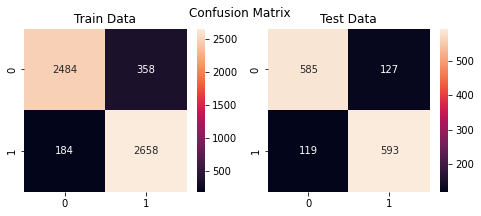

In [472]:
print_bold('Random Forest Classifier Statistics with balanced dataset and normalization:')
print_classification_report(y_train,train_y_predicted,y_test,test_y_predicted)
plot_confusion_matrix(y_train,train_y_predicted,y_test,test_y_predicted)

**6. Kernel Machine Classification**

In [473]:
X_train = X_train_norm.copy()
y_train = y_train_norm.copy()
X_test = X_test_norm.copy()
y_test = y_test_norm.copy()

print_shape_type_of_dataset(X_train,X_test,y_train, y_test)

num_features = X_train.shape[1]
print('No of Feature:', num_features)

X train Dataset Shape:  (5684, 19) Type of X train dataset:  <class 'pandas.core.frame.DataFrame'>
X test Dataset Shape:  (1424, 19) Type of X Test dataset:  <class 'pandas.core.frame.DataFrame'>
Y train Dataset Shape:  (5684,) Type of Y train dataset:  <class 'pandas.core.series.Series'>
Y test Dataset Shape:  (1424,) Type of Y test dataset:  <class 'pandas.core.frame.DataFrame'>
No of Feature: 19


In [474]:
#Finding the best Hyperparameter
from sklearn.svm import SVC

gammas = [0.0001,0.001, 0.01, 0.1, 1,2, 3,5, 20, 40, 60, 80, 100]
kernels = ['sigmoid','rbf'] 
best_gamma = {}
cv_k = 5 #5-fold cross validation
for i_kernel in kernels:
  print ('kernel :',i_kernel)
  avg_score = np.zeros(len(gammas))
  for i_gamma in gammas:
    clf = SVC(kernel=i_kernel, gamma=i_gamma, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv=cv_k) 
    avg_score[gammas.index(i_gamma)] = np.mean(scores)
   
  print ('Average_score:', avg_score)
  max_score_index = np.argmax(avg_score)
 
  best_gamma[i_kernel] = gammas[int(max_score_index)]

print ('Best hyper-parameters for Kernel Machine = ', best_gamma)

kernel : sigmoid
Average_score: [0.52728904 0.74981667 0.76530498 0.79872936 0.63617935 0.40744159
 0.30717217 0.4750223  0.49929655 0.49525066 0.49190838 0.48909426
 0.48751115]
kernel : rbf
Average_score: [0.52728904 0.76020058 0.76688794 0.81139643 0.84253766 0.85326966
 0.8573171  0.8611874  0.87403037 0.87965984 0.88124326 0.88317772
 0.88476067]
Best hyper-parameters for Kernel Machine =  {'sigmoid': 0.1, 'rbf': 100}


Kernel Machine Classifier Statistics with balanced dataset with rbf kernel and normalization: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      2842
           1       0.78      0.97      0.87      2842

    accuracy                           0.85      5684
   macro avg       0.87      0.85      0.85      5684
weighted avg       0.87      0.85      0.85      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       712
           1       0.76      0.95      0.85       712

    accuracy                           0.83      1424
   macro avg       0.85      0.83      0.82      1424
weighted avg       0.85      0.83      0.82      1424

Train confusion matrix: 
 [[2058  784]
 [  74 2768]] 
Test confusion matrix: 
 [[496 216]
 [ 33 679]] 


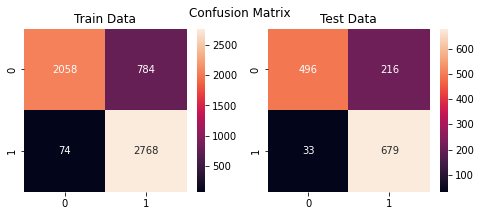

In [475]:
#Implement Gaussian Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',gamma=1, max_iter = 10000, random_state = 0 )
svclassifier.fit(X_train, y_train)

y_test_pred_rbf = svclassifier.predict(X_test)
y_train_pred_rbf = svclassifier.predict(X_train)

print_bold('Kernel Machine Classifier Statistics with balanced dataset with rbf kernel and normalization:')
print_classification_report(y_train,y_train_pred_rbf, y_test ,y_test_pred_rbf  )
plot_confusion_matrix(y_train,y_train_pred_rbf, y_test ,y_test_pred_rbf )

Kernel Machine Classifier Statistics with balanced dataset with sigmoid kernel and normalization: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.40      0.57      2842
           1       0.62      0.99      0.77      2842

    accuracy                           0.70      5684
   macro avg       0.80      0.70      0.67      5684
weighted avg       0.80      0.70      0.67      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.45      0.62       712
           1       0.64      0.99      0.78       712

    accuracy                           0.72      1424
   macro avg       0.81      0.72      0.70      1424
weighted avg       0.81      0.72      0.70      1424

Train confusion matrix: 
 [[1151 1691]
 [  24 2818]] 
Test confusion matrix: 
 [[322 390]
 [  6 706]] 


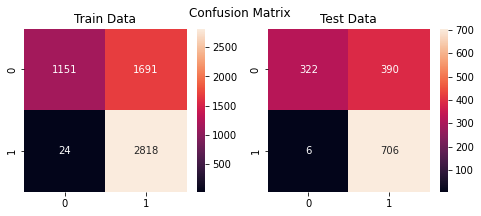

In [476]:
#implement Sigmoid Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', gamma= 0.001,max_iter = 10000, random_state = 0)
svclassifier.fit(X_train, y_train)

y_test_pred_sig = svclassifier.predict(X_test)
y_train_pred_sig = svclassifier.predict(X_train)

print_bold('Kernel Machine Classifier Statistics with balanced dataset with sigmoid kernel and normalization:')
print_classification_report(y_train,y_train_pred_sig, y_test ,y_test_pred_sig  )
plot_confusion_matrix(y_train,y_train_pred_sig, y_test ,y_test_pred_sig )